# select features using random forest

In [136]:
import json
import os
from copy import deepcopy
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

# classifier

In [ ]:
from seq.classifier import Classifier
cl = Classifier()

## physcial chemical properties

In [77]:
infile = '/home/yuan/results/epitope/epi_physical_chemical.txt'
df1 = cl.get_df(infile)

input data: (3458238, 17)


In [ ]:
# prepare X and y
X1_train, X1_test, y1_train, y1_test = cl.xy(df2)

In [78]:
#split data and train model
model1 = cl.train_rf(X1_train, y1_train)

X and y: (3458238, 15) float16 (3458238,) float16
labels: Counter({1.0: 1865242, 0.0: 1592996})
train data: (2420766, 15) (2420766,)
test_data:  (1037472, 15) (1037472,)


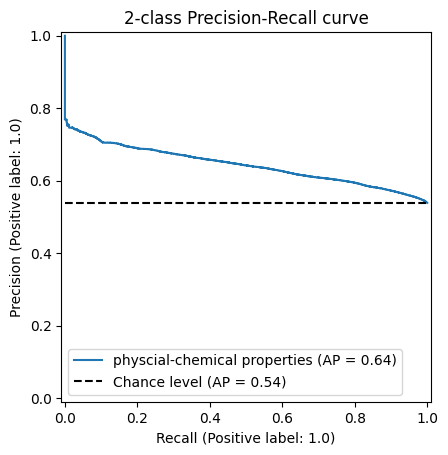

In [79]:
from sklearn.metrics import PrecisionRecallDisplay

# average precision
display = PrecisionRecallDisplay.from_estimator(
    model1, X1_test, y1_test, 
    name='physcial-chemical properties',
    plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

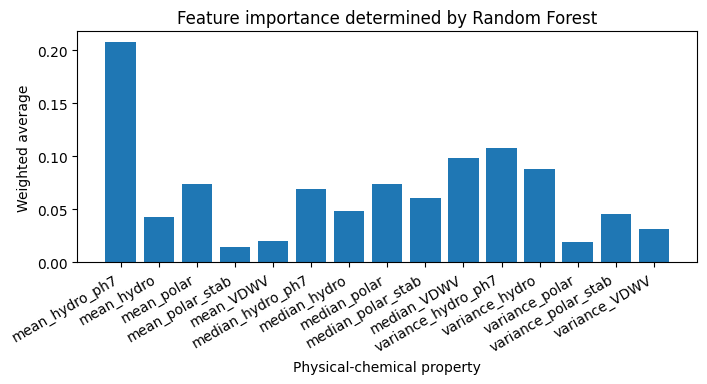

In [80]:
# feature importance
imp = pd.Series(model1.feature_importances_, index = list(df1)[2:])

plt.figure(figsize=(8,3))
plt.bar(imp.index, imp)
plt.title('Feature importance determined by Random Forest')
plt.xlabel('Physical-chemical property')
plt.ylabel('Weighted average')
# ha: horizontal alignment
plt.xticks(rotation=30, ha='right')
plt.show()

## frequencies of amio acids

In [81]:
infile = '/home/yuan/results/epitope/epi_frequency_aa.txt'
df2 = cl.get_df(infile)

input data: (3458238, 422)


In [ ]:
# prepare X and y
X2_train, X2_test, y2_train, y2_test = cl.xy(df2)

In [82]:
#split data and train model
model2 = cl.train_rf(X2_train, y2_train)

X and y: (3458238, 420) float16 (3458238,) float16
labels: Counter({1.0: 1865242, 0.0: 1592996})
train data: (2420766, 420) (2420766,)
test_data:  (1037472, 420) (1037472,)


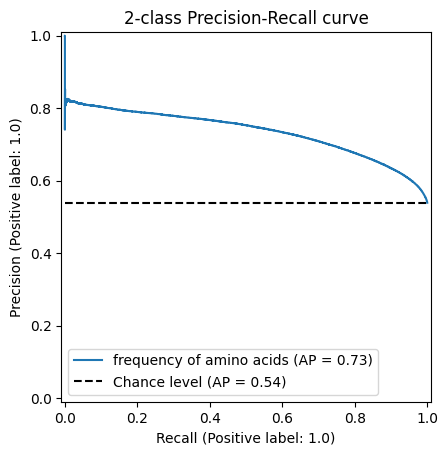

In [83]:
from sklearn.metrics import PrecisionRecallDisplay

# average precision
display = PrecisionRecallDisplay.from_estimator(
    model2, X2_test, y2_test, 
    name='frequency of amino acids',
    plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

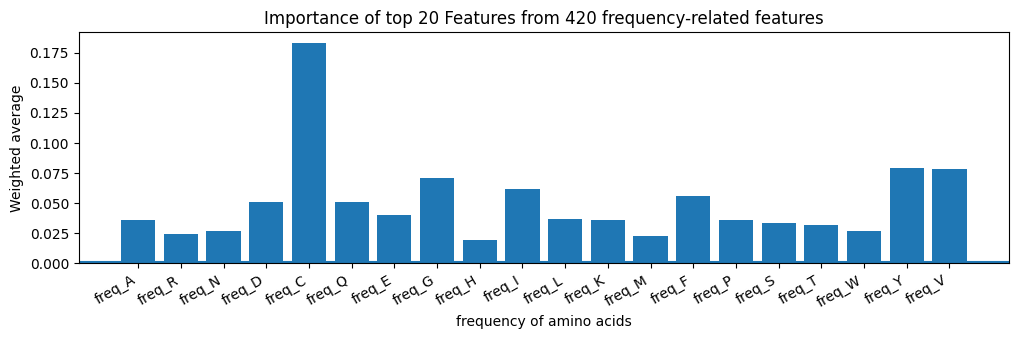

In [86]:
# feature importance
imp = pd.Series(model2.feature_importances_, index = list(df2)[2:])
threshold = 0.001
top_freq = imp[imp > threshold]

plt.figure(figsize=(12,3))
plt.bar(top_freq.index, top_freq)
plt.title(f'Importance of top {len(top_freq)} Features from {len(imp)} frequency-related features')
plt.xlabel('frequency of amino acids')
plt.ylabel('Weighted average')
# ha: horizontal alignment
plt.xticks(rotation=30, ha='right')
plt.axhline(y=threshold)
plt.show()

In [87]:
top_freq.index

Index(['freq_A', 'freq_R', 'freq_N', 'freq_D', 'freq_C', 'freq_Q', 'freq_E',
       'freq_G', 'freq_H', 'freq_I', 'freq_L', 'freq_K', 'freq_M', 'freq_F',
       'freq_P', 'freq_S', 'freq_T', 'freq_W', 'freq_Y', 'freq_V'],
      dtype='object')

## if existing

In [93]:
infile = '/home/yuan/results/epitope/epi_aa_existing.txt'
df3 = cl.get_df(infile)

input data: (3458238, 422)


In [ ]:
# prepare X and y
X3_train, X3_test, y3_train, y3_test = cl.xy(df3)

In [95]:
#split data and train model
model3 = cl.train_rf(X3_train, y3_train)

X and y: (3458238, 420) float16 (3458238,) float16
labels: Counter({1.0: 1865242, 0.0: 1592996})
train data: (2420766, 420) (2420766,)
test_data:  (1037472, 420) (1037472,)


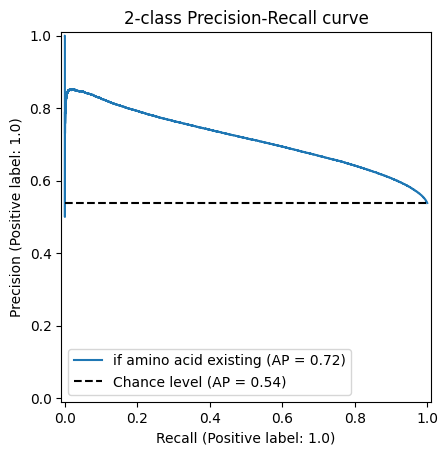

In [96]:
from sklearn.metrics import PrecisionRecallDisplay

# average precision
display = PrecisionRecallDisplay.from_estimator(
    model3, X3_test, y3_test, 
    name='if amino acid existing',
    plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

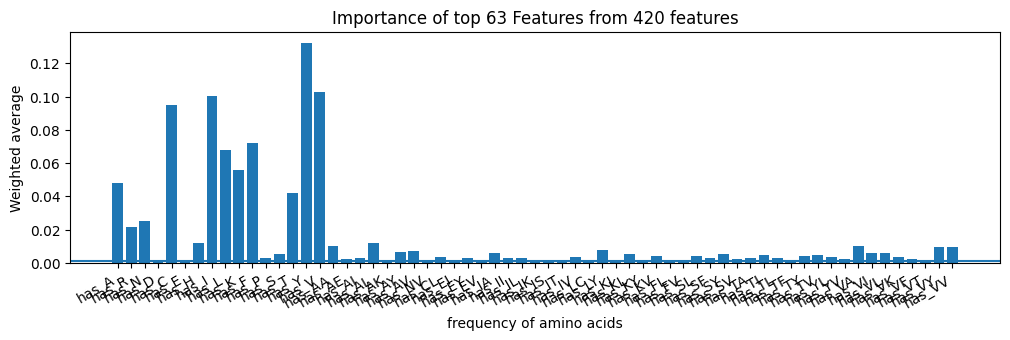

In [97]:
# feature importance
imp = pd.Series(model3.feature_importances_, index = list(df3)[2:])
threshold = 0.001
top_exist = imp[imp > threshold]

plt.figure(figsize=(12,3))
plt.bar(top_exist.index, top_exist)
plt.title(f'Importance of top {len(top_exist)} Features from {len(imp)} features')
plt.xlabel('frequency of amino acids')
plt.ylabel('Weighted average')
# ha: horizontal alignment
plt.xticks(rotation=30, ha='right')
plt.axhline(y=threshold)
plt.show()

In [ ]:
top_exist.index

## all features

In [98]:
df =pd.concat([df1, df2[top_freq.index], df3[top_exist.index]], axis=1)
print(df.shape)
print(df.head())

(3458238, 100)
                      seq  label  mean_hydro_ph7  mean_hydro  mean_polar  \
1492532  VVTYPSLNYAGALWDI      1       39.312500    1.136875    7.512500   
3070024         EMRSLGVDM      0       24.000000    0.762222    8.466667   
3083524         ALCLLHEGK      0       37.222222    0.952222    7.922222   
2033954         HDKSDRDRE      0      -27.111111    0.540000   11.466667   
938486        GEVGLPGLSGP      1       12.909091    0.825455    8.109091   

         mean_polar_stab  mean_VDWV  median_hydro_ph7  median_hydro  \
1492532         0.154688   3.354375              52.0          1.32   
3070024         0.153000   3.350000               0.0          0.60   
3083524         0.148000   3.182222              41.0          1.07   
2033954         0.173222   3.934444             -23.0          0.47   
938486          0.089727   1.983636               0.0          0.47   

         median_polar  ...  has_YL  has_YV  has_VA  has_VI  has_VL  has_VK  \
1492532           7.1  

In [131]:
# prepare X and y
X_train, X_test, y_train, y_test = cl.xy(df)

X and y: (3458238, 98) float16 (3458238,) float16
labels: Counter({1.0: 1865242, 0.0: 1592996})
train data: (2420766, 98) (2420766,)
test_data:  (1037472, 98) (1037472,)


In [132]:
#split data and train model
model = cl.train_rf(X_train, y_train)

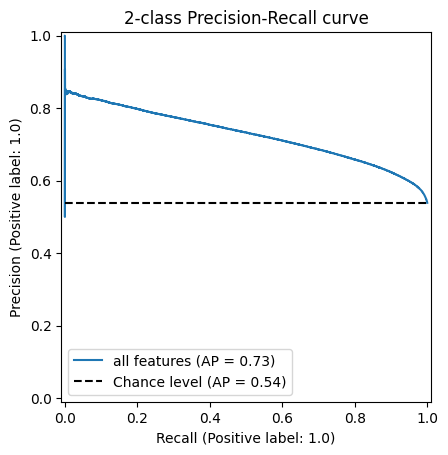

In [133]:
from sklearn.metrics import PrecisionRecallDisplay

# average precision
display = PrecisionRecallDisplay.from_estimator(
    model, X_test, y_test, 
    name='all features',
    plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

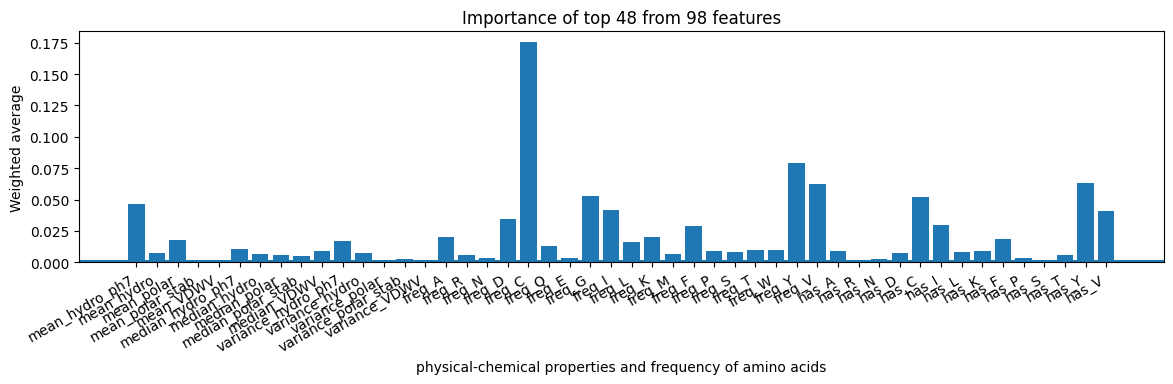

In [134]:
# feature importance
imp = pd.Series(model.feature_importances_, index = list(df)[2:])
threshold = 0.001
top_imp = imp[imp > threshold]

plt.figure(figsize=(14,3))
plt.bar(top_imp.index, top_imp)
plt.title(f'Importance of top {len(top_imp)} from {len(imp)} features')
plt.xlabel('physical-chemical properties and frequency of amino acids')
plt.ylabel('Weighted average')
# ha: horizontal alignment
plt.xticks(rotation=30, ha='right')
plt.axhline(y=threshold)
plt.show()

In [135]:
top_imp.index

Index(['mean_hydro_ph7', 'mean_hydro', 'mean_polar', 'mean_polar_stab',
       'mean_VDWV', 'median_hydro_ph7', 'median_hydro', 'median_polar',
       'median_polar_stab', 'median_VDWV', 'variance_hydro_ph7',
       'variance_hydro', 'variance_polar', 'variance_polar_stab',
       'variance_VDWV', 'freq_A', 'freq_R', 'freq_N', 'freq_D', 'freq_C',
       'freq_Q', 'freq_E', 'freq_G', 'freq_I', 'freq_L', 'freq_K', 'freq_M',
       'freq_F', 'freq_P', 'freq_S', 'freq_T', 'freq_W', 'freq_Y', 'freq_V',
       'has_A', 'has_R', 'has_N', 'has_D', 'has_C', 'has_I', 'has_L', 'has_K',
       'has_F', 'has_P', 'has_S', 'has_T', 'has_Y', 'has_V'],
      dtype='object')

In [109]:
top_df = df[['seq', 'label'] + list(top_imp.index)]
outfile = '/home/yuan/results/epitope/epi_top_features.txt'
top_df.to_csv(outfile, header=True, index=False, sep='\t')

#### distribution of top features

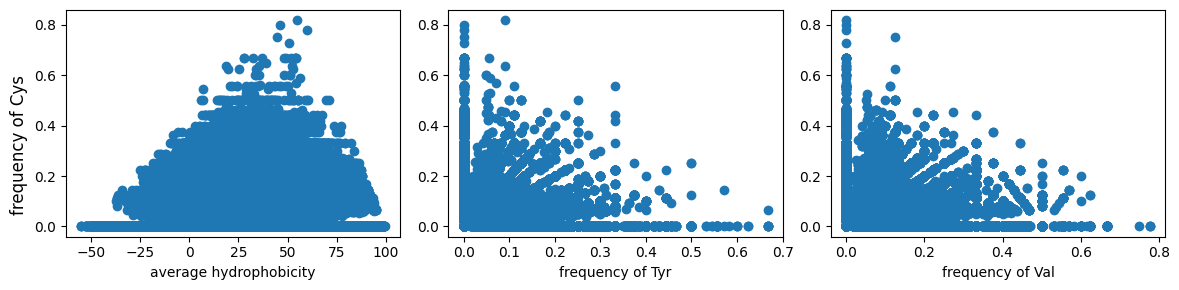

In [127]:
fig, ax = plt.subplots(1, 3, figsize=(12,3), layout='tight')
fig.supylabel('frequency of Cys')

i=0
ax[i].scatter(top_df['mean_hydro_ph7'], top_df['freq_C'])
ax[i].set_xlabel('average hydrophobicity')
i=1
ax[i].scatter(top_df['freq_Y'], top_df['freq_C'])
ax[i].set_xlabel('frequency of Tyr')
i=2
ax[i].scatter(top_df['freq_V'], top_df['freq_C'])
ax[i].set_xlabel('frequency of Val')
plt.show()

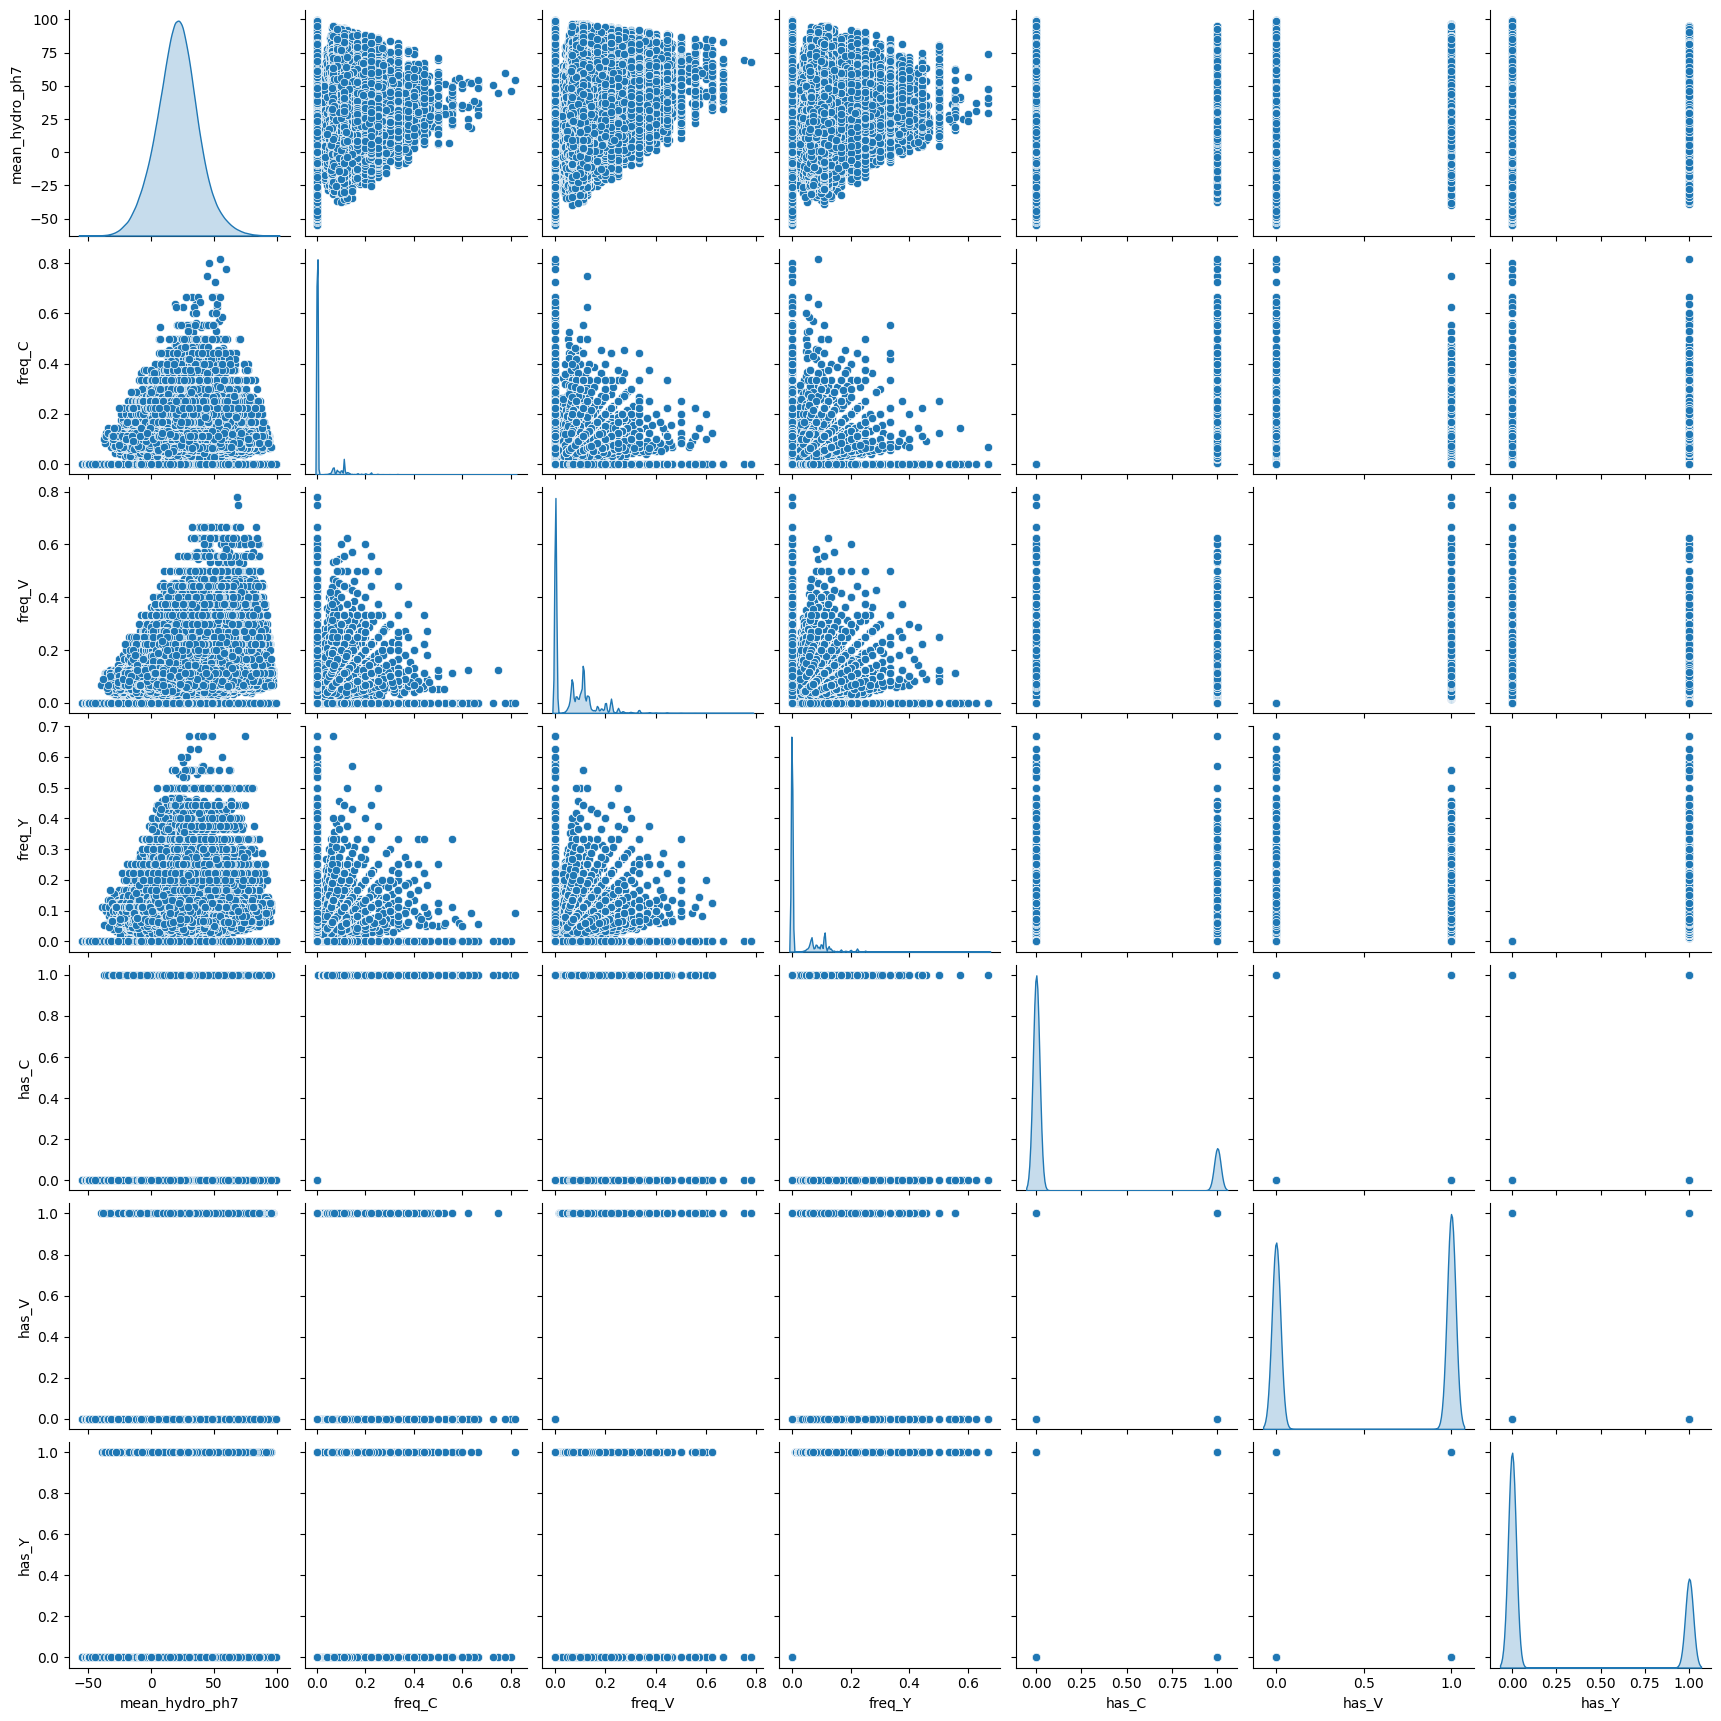

In [138]:
# correlations among features
names = ['mean_hydro_ph7','freq_C', 'freq_V', 'freq_Y','has_C', 'has_V', 'has_Y',]
sns.pairplot(df[names], diag_kind='kde')

## test

In [110]:
pred_test = model.predict(X_test)
pred_test[:10]

array([1., 1., 0., 0., 1., 0., 0., 1., 0., 0.], dtype=float16)

Text(0.5, 1.0, 'Prediction of non-epitopes 478345')

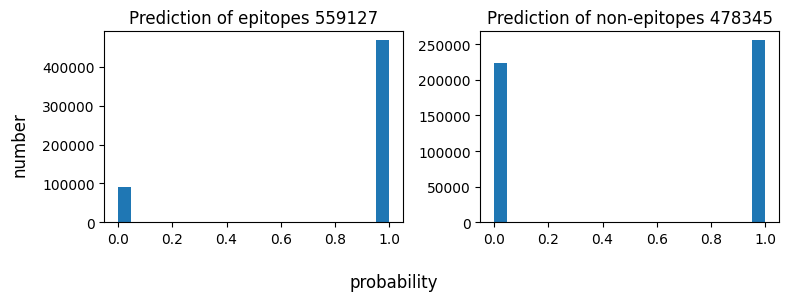

In [111]:
t = pred_test[y_test==1]
f = pred_test[y_test==0]
fig, ax = plt.subplots(1, 2, figsize=(8,3), layout='tight')
fig.supxlabel('probability')
fig.supylabel('number')

ax[0].hist(t, label='True', bins=20)
ax[0].set_title(f'Prediction of epitopes {len(t)}')
ax[1].hist(f, label='False', bins=20)
ax[1].set_title(f'Prediction of non-epitopes {len(f)}')

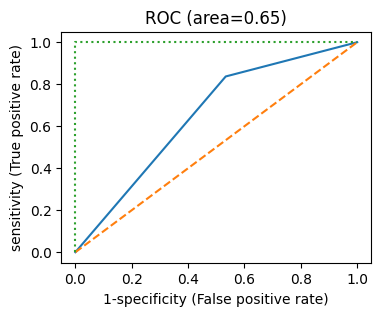

In [112]:
# ROC curve only for binary classfication
from sklearn.metrics import roc_curve, auc
# FPR, false positive rate, 1- specificity, typ I error
# TPR, true positive rate, sensitivity, power
fpr, tpr, thresholds = roc_curve(y_test, pred_test)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(1, figsize=(4,3))
ax.plot(fpr, tpr)
ax.set_xlabel('1-specificity (False positive rate)')
ax.set_ylabel('sensitivity (True positive rate)')
plt.title(f'ROC (area={roc_auc:.2f})')
ax.plot([0,1], [0,1], '--')
ax.plot([0,0,1], [0,1,1], ':')